***Lab 2***

In [1]:
#Import needed tools
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import minimize

**I. Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision 𝜀 = 0.001) solution 𝑥: 𝑓(𝑥) → 𝑚𝑖𝑛 for the following functions and domains:**

**1.𝑓(𝑥) = 𝑥^3, 𝑥 ∈ [0, 1];**

**2.𝑓(𝑥) = |𝑥 − 0.2|, 𝑥 ∈ [0, 1];**

**3.𝑓(𝑥) = 𝑥 𝑠𝑖𝑛 (1/x), 𝑥 ∈ [0.01, 1].**

**Calculate the number of 𝑓-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.**

1. Creating of functions

    1.1. Functions of methods

In [2]:
#1. Brute-Force (Exhaustive Search) Method
def brute_force_method(func):
    ans = []
    number_of_iterations = 0
    if str(func.__name__)=='sinus':
        for i in range(0,1001):
            number_of_iterations+=1
            ans.append(func(0.99/1000*i+0.01))
    else:
        for i in range(0,1001):
            number_of_iterations+=1
            ans.append(func(i/1000))
    return min(ans),len(ans),number_of_iterations

In [3]:
#2. Dichotomy Method
def dichotomy_method(func,left,right):
    beta = 0.0009
    number_of_dots = 0
    number_of_iterations = 0
    while abs(left-right)>=0.001:
        number_of_iterations+=1
        number_of_dots+=2
        x1 = (left+right-beta)/2
        x2 = (left+right+beta)/2
        if func(x1)<=func(x2):
            right = x2
        else:
            left = x1
    return func((left+right)/2),number_of_dots+1,number_of_iterations

In [4]:
#3. Golden Section Method
def golden_section_method(func,left,right):
    number_of_dots = 0
    number_of_iterations = 0
    x1 = left+(3-np.sqrt(5))/2*(right-left)
    x2 = right+(np.sqrt(5)-3)/2*(right-left)
    while abs(left-right)>=0.001:
        number_of_iterations+=1
        number_of_dots+=1
        if func(x1)<=func(x2):
            right = x2
            x2 = x1
            x1 = left+(3-np.sqrt(5))/2*(right-left)
        else:
            left = x1
            x1 = x2
            x2 = right+(np.sqrt(5)-3)/2*(right-left) 
    return func((left+right)/2),number_of_dots+3,number_of_iterations

    1.2. Following functions

In [5]:
#1. Cube function
def cube(x):
    return x**3

In [6]:
#2. Module function
def module(x):
    return abs(x-0.2)

In [7]:
#3. Sinus function
def sinus(x):
    return x*np.sin(1/x)

2. Finding minimum, F-calculations and N of iterations

    2.1. For Brute-Force Method

In [8]:
print('(min, F-calculations, N of iterations)')
print(brute_force_method(cube))
print(brute_force_method(module))
print(brute_force_method(sinus))

(min, F-calculations, N of iterations)
(0.0, 1001, 1001)
(0.0, 1001, 1001)
(-0.21722960129123117, 1001, 1001)


    2.2. For Dichotomy Method

In [9]:
print('(min, F-calculations, N of iterations)')
print(dichotomy_method(cube,0,1))
print(dichotomy_method(module,0,1))
print(dichotomy_method(sinus,0.01,1))

(min, F-calculations, N of iterations)
(1.1093111164523245e-10, 29, 14)
(7.785034179669248e-06, 29, 14)
(-0.2172336224666543, 29, 14)


    2.3. For Golden Section Method

In [10]:
print('(min, F-calculations, N of iterations)')
print(golden_section_method(cube,0,1))
print(golden_section_method(module,0,1))
print(golden_section_method(sinus,0.01,1))

(min, F-calculations, N of iterations)
(4.9256800857728296e-11, 18, 15)
(7.331374358568454e-05, 18, 15)
(-0.21723232817753246, 18, 15)


**II. Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1). Furthermore, generate the noisy data {𝑥>, 𝑦>}, where 𝑘 = 0,…,100, according to the following rule:**

**𝑦_k = 𝛼𝑥_k + 𝛽 + 𝛿_k, 𝑥_k = k/100,**

**where 𝛿_k~𝑁(0,1) are values of a random variable with standard normal distribution. Approximate the data by the following linear and rational functions:**

**1. 𝐹(𝑥, 𝑎, 𝑏) = 𝑎𝑥 + 𝑏 (linear approximant),**

**2. 𝐹(𝑥, 𝑎, 𝑏) = 𝑎/(1+𝑏𝑥) (rational approximant),**

**by means of least squares through the numerical minimization (with precision 𝜀 = 0.001) of the following function:**

**𝐷(𝑎, 𝑏) =  sum(k=0, 100)((𝐹(𝑥_k, 𝑎, 𝑏) − 𝑦_k)^2)**

**To solve the minimization problem, use the methods of exhaustive search, Gauss and Nelder-Mead. If necessary, set the initial approximations and other parameters of the methods. Visualize the data and the approximants obtained in a plot separately for each type of approximant so that one can compare the results for the numerical methods used. Analyze the results obtained (in terms of number of iterations, precision, number of function evaluations, etc.).**

    1.0. Creating needed variables

In [11]:
#Initialization of X and Y dots coordinates
alpha = random.uniform(0,1)
beta = random.uniform(0,1)

x_k = np.array([i/100 for i in range(0,101)])
y_k = [alpha*i+beta+random.normalvariate(0.5,0.125) for i in x_k]

    1.1. Least-squares Method

[a,b] =  [0.4590480240614555, 0.9507455322975492]


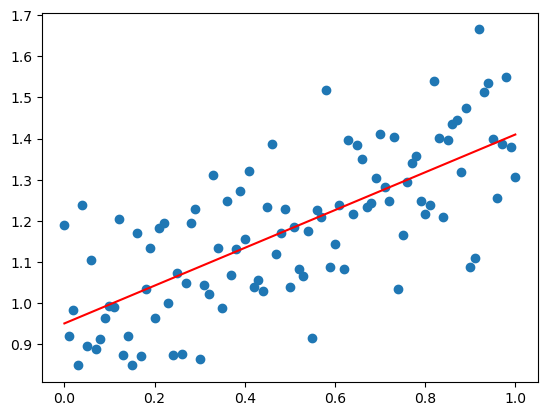

In [12]:
X = np.vstack([x_k, np.ones(len(x_k))]).T
a,b = np.linalg.lstsq(X, y_k, rcond=None)[0]

print('[a,b] = ',[a,b])

plt.scatter(x_k, y_k)
plt.plot(x_k, a*x_k+b, 'r')

    1.2. Brute-Force Method

        1.2.1. For linear function

In [ ]:
lin_ans = []
for a in range(0,1001):
    a/=1000
    for b in range(0,1001):
        b/=1000
        dot_number = 0
        for k in range(0,101):
            dot_number+=(a*x_k[k]+b-y_k[k])**2
        lin_ans.append([dot_number,a,b])

minimum = min(i[0] for i in lin_ans)
for elem in lin_ans:
    if elem[0]==minimum:
        a = elem[1]
        b = elem[2]
        break

print('[a,b,F-calculation,N of iterations] = ',[a,b,(1001**2),(1001**2)])

brute_force_lin = [a,b]

plt.scatter(x_k, y_k)
plt.plot(x_k, a*x_k+b, 'r')

        1.2.2. For rational function

In [ ]:
rat_ans = []
for a in range(0,1001):
    a/=1000
    for b in range(0,1001):
        b = -b/1000
        dot_number = 0
        for k in range(0,101):
            dot_number+=(a/(1+b*x_k[k])-y_k[k])**2
        rat_ans.append([dot_number,a,b])

minimum = min(i[0] for i in rat_ans)
for elem in rat_ans:
    if elem[0]==minimum:
        a = elem[1]
        b = elem[2]
        break
        
print('[a,b,F-calculation,N of iterations] = ',[a,b,(1000**2),(1000**2)])

brute_force_rat = [a,b]

plt.scatter(x_k, y_k)
plt.plot(x_k, a/(1+b*x_k), 'r')

    1.3. Gauss (Coordinate Descent) Method

        1.3.1. For linear function

In [ ]:
a1 = 0.05
b1 = 0.05
b1_temp = 10000
number_of_iterations = 0
number_of_dots = 0
while True:
    number_of_iterations+=2
    ans_a = []
    for a in range(0,1001):
        number_of_dots+=1
        a/=1000
        dot_number = 0
        for k in range(0,101):
            dot_number+=(a*x_k[k]+b1-y_k[k])**2
        ans_a.append(dot_number)
    a1_temp = ans_a.index(min(ans_a))/1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp
    
    
    ans_b = []
    for a in range(0,1001):
        number_of_dots+=1
        b/=1000
        dot_number = 0
        for k in range(0,101):
            dot_number+=(a1*x_k[k]+b-y_k[k])**2
        ans_b.append(dot_number)
    b1_temp = ans_b.index(min(ans_b))/1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

print('[a,b,F-calculation,N of iterations] = ',[a1,b1,number_of_dots,number_of_iterations])
    
gauss_lin = [a1,b1]

plt.scatter(x_k, y_k)
plt.plot(x_k, a1*x_k+b1, 'r')

        1.3.2. For rational function

In [ ]:
a1 = 0.05
b1 = -0.05
b1_temp = 10000
number_of_iterations = 0
number_of_dots = 0
while True:
    number_of_iterations+=2
    ans_a = []
    for a in range(0, 1000):
        number_of_dots += 1
        a/=1000
        dot_number = 0
        for k in range(0, 101):
            dot_number += (a/(1+b1*x_k[k])-y_k[k])**2
        ans_a.append(dot_number)
    a1_temp = ans_a.index(min(ans_a))/1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    ans_b = []
    for b in range(0, 1000):
        number_of_dots+=1
        b = -b/1000
        dot_number = 0
        for k in range(0, 101):
            dot_number += (a1/(1+b*x_k[k])-y_k[k])**2
        ans_b.append(dot_number)
    b1_temp = ans_b.index(min(ans_b))/-1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp
    
print('[a, b, f-calculations, N of iterations] =',[a1, b1, f_calc, number_of_iterations])

gauss_rat = [a1,b1]
plt.scatter(x_k,y_k)
plt.plot(x_k, a1/(1+b1*x_k), 'r')

    1.4. Nelder-Mead Method

        1.4.1. For linear function

In [ ]:
def lin_func(data):
    a,b = data
    ans = 0
    for k in range(0,101):
        ans+=(a*x_k[k]+b-y_k[k])**2
    return ans

res = minimize(lin_func,[0.3, 0.3], method = 'nelder-mead', options = {'xatol': 0.001, 'disp': True})
nm_lin = res.x

print('[a,b] = ',res.x)

plt.scatter(x_k, y_k)
plt.plot(x_k, res.x[0] * x_k + res.x[1],'r')

        1.4.2. For rational function

In [ ]:
def rat_func(data):
    a,b = data
    ans = 0
    for k in range(0,101):
        ans+=(a/(1+b*x_k[k])-y_k[k])**2
    return ans

res = minimize(rat_func,[0.3, 0.3], method = 'nelder-mead', options = {'xatol': 0.001, 'disp': True})
nm_rat = res.x

print('[a,b] = ',res.x)

plt.scatter(x_k, y_k)
plt.plot(x_k, res.x[0] / (1 + res.x[1] * x_k),'r')

    1.5. Comparison of methods

        1.5.1. For linear function

In [ ]:
plt.figure()
plt.title('For linear function')
plt.plot(x_k, y_k, '.b', label = 'Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_k, brute_force_lin[0]*x_k + brute_force_lin[1], 'g', label = 'Brute-Force Method', linewidth = 3)
plt.plot(x_k, gauss_lin[0]*x_k + gauss_lin[1], 'y', label = 'Gauss Method', linewidth = 3)
plt.plot(x_k, nm_lin[0]*x_k + nm_lin[1], 'r', label = 'Nelder-Mead Method', linewidth = 3)
plt.legend(fontsize=12)

        1.5.2. For rational function

In [ ]:
plt.figure()
plt.title('For rational function')
plt.plot(x_k, y_k, '.b', label = 'Data')
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(x_k, brute_force_rat[0]/(1+brute_force_rat[1]*x_k), 'g', label = 'Brute-Force Method', linewidth = 3)
plt.plot(x_k, gauss_rat[0]/(1+gauss_rat[1]*x_k), 'y', label = 'Gauss Method', linewidth = 3)
plt.plot(x_k, nm_rat[0]/(1+nm_rat[1]*x_k), 'r', label = 'Nelder-Mead Method', linewidth = 3)
plt.legend(fontsize=12)